In [2]:
# This code connects your Google Drive to this Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the necessary tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Image size (we'll make all images 180x180 pixels)
IMG_HEIGHT = 180
IMG_WIDTH = 180
# Batch size is how many images the model looks at in one go
BATCH_SIZE = 8 # A small number is good for a small dataset

# Path to your training data folder
train_dir = "/content/drive/MyDrive/Colab Notebooks/fruits/fruits/training_data"
# Path to your testing data folder
test_dir = "/content/drive/MyDrive/Colab Notebooks/fruits/fruits/testing_data"


# --- Load the data ---
# Keras is smart! It will automatically find the images, resize them,
# and know that images in the 'apple' folder are apples.

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred', # Automatically figure out labels from folder names
    label_mode='categorical', # For multiple classes
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Get the class names (it will be ['apple', 'banana', 'orange'])
class_names = train_dataset.class_names
print("Found the following classes:", class_names)

Found 91 files belonging to 3 classes.
Found 18 files belonging to 3 classes.
Found the following classes: ['Apple', 'Banana', 'Custard Apple']


In [4]:
# --- Build the Brain (The CNN Model) WITH DATA AUGMENTATION ---

# First, create the data augmentation "recipe"
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

# Now, build the model just like before, but add the augmentation layer first
model = keras.Sequential([
    # Input Layer
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # Apply the data augmentation recipe to the images
    data_augmentation,

    # The rest of the model is the same
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # This is also important for preventing overfitting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax') # 3 fruits
])

# Now compile and train this new model exactly as you did before!
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Import the tool
from tensorflow.keras.callbacks import EarlyStopping

# Set up the rule: stop if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_loss', # Watch the validation loss
    patience=3,         # Number of epochs to wait for improvement
    restore_best_weights=True # Automatically use the best version of the model
)

# NOW, add this callback when you train the model
history = model.fit(
    train_dataset,
    epochs=10, # You can set a higher number of epochs now
    validation_data=test_dataset,
    callbacks=[early_stopping] # Add the callback here!
)
# Let's see a summary of our brain structure
model.summary()

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.4211 - loss: 1.6127 - val_accuracy: 0.6667 - val_loss: 0.8686
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7336 - loss: 0.7156 - val_accuracy: 0.7778 - val_loss: 0.4447
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9717 - loss: 0.2780 - val_accuracy: 1.0000 - val_loss: 0.0586
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0182 - val_accuracy: 0.9444 - val_loss: 0.0599
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9693 - loss: 0.0476 - val_accuracy: 1.0000 - val_loss: 4.8043e-04
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 890ms/step - accuracy: 0.9823 - loss: 0.0412 - val_accuracy: 0.9444 - val_loss: 0.1913
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - va

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,083 (45.65 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,056 (30.43 MB)

In [5]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 1.0000 - loss: 3.8976e-04
Test Accuracy: 100.00%


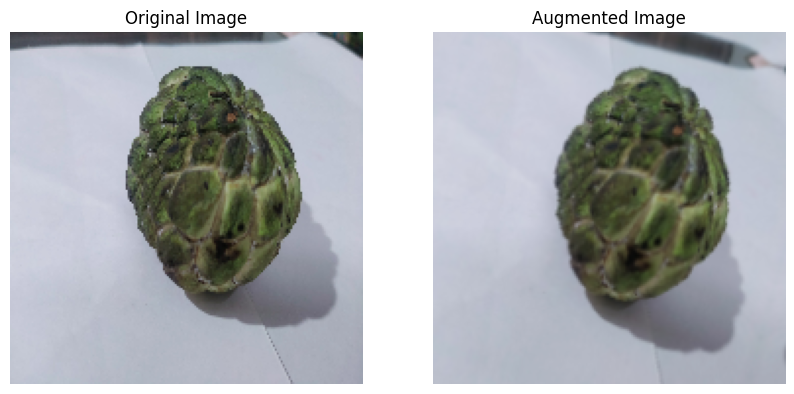

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf

# --- Get one batch of images to play with ---
for images, labels in train_dataset.take(1):
  # Let's just use the first image from the batch
  first_image = images[0]

  # Set up the same augmentation layer we used for the model
  data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),  # Increased from 0.1
    layers.RandomZoom(0.2),      # Increased from 0.1
    layers.RandomContrast(0.1),  # Add another type of augmentation
])


  # --- Display the original vs. augmented image ---
  plt.figure(figsize=(10, 5))

  # Original
  plt.subplot(1, 2, 1)
  plt.imshow(first_image / 255.0) # We divide by 255 to show it properly
  plt.title("Original Image")
  plt.axis("off")

  # Augmented
  # We need to add a "batch" dimension before passing it to the layer
  augmented_image = data_augmentation(tf.expand_dims(first_image, 0))

  plt.subplot(1, 2, 2)
  # The output of the layer is a batch, so we take the first item
  plt.imshow(augmented_image[0] / 255.0)
  plt.title("Augmented Image")
  plt.axis("off")

  plt.show()

In [7]:
import os

# --- Create a directory to save the images ---
save_dir = "Saved_Augmented_Images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Use the same augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),  # Increased from 0.1
    layers.RandomZoom(0.2),      # Increased from 0.1
    layers.RandomContrast(0.1),  # Add another type of augmentation
])


print(f"Generating and saving augmented images to '{save_dir}'...")

# --- Loop through your dataset and save augmented images ---
# We'll go through each original image in your training set
image_counter = 0
for original_images, original_labels in train_dataset.unbatch().take(75): # 75 is your total training images

    # For each original image, let's create 5 augmented versions
    for i in range(5):
        # Apply the augmentation
        augmented_image = data_augmentation(tf.expand_dims(original_images, 0))

        # Define the new filename
        new_filename = f"aug_{image_counter}_variant_{i+1}.png"
        save_path = os.path.join(save_dir, new_filename)

        # Save the image
        tf.keras.utils.save_img(save_path, augmented_image[0])

    image_counter += 1

print(f"Done! Saved {image_counter * 5} new images.")

Generating and saving augmented images to 'Saved_Augmented_Images'...
Done! Saved 375 new images.


In [8]:
import os

# --- Create a directory to save the images ---
save_dir = "Saved_Augmented_Images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Use the same augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),  # Increased from 0.1
    layers.RandomZoom(0.2),      # Increased from 0.1
    layers.RandomContrast(0.1),  # Add another type of augmentation
])


print(f"Generating and saving augmented images to '{save_dir}'...")

# --- Loop through your dataset and save augmented images ---
# We'll go through each original image in your training set
image_counter = 0
for original_images, original_labels in train_dataset.unbatch().take(75): # 75 is your total training images

    # For each original image, let's create 5 augmented versions
    for i in range(5):
        # Apply the augmentation
        augmented_image = data_augmentation(tf.expand_dims(original_images, 0))

        # Define the new filename
        new_filename = f"aug_{image_counter}_variant_{i+1}.png"
        save_path = os.path.join(save_dir, new_filename)

        # Save the image
        tf.keras.utils.save_img(save_path, augmented_image[0])

    image_counter += 1

print(f"Done! Saved {image_counter * 5} new images.")

Generating and saving augmented images to 'Saved_Augmented_Images'...
Done! Saved 375 new images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


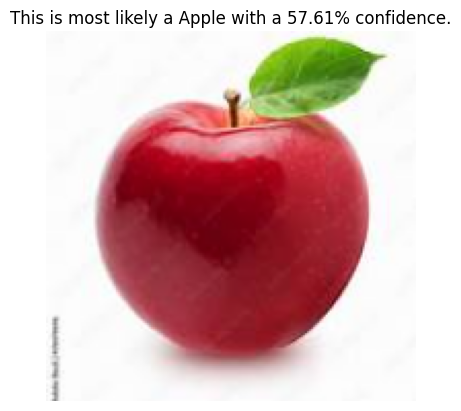


Full prediction scores:
Apple: 100.00%
Banana: 0.00%
Custard Apple: 0.00%


In [9]:
import numpy as np

# --- Load and prepare your new image ---
image_path = '/content/Screenshot 2025-08-20 085243.png' # Make sure this is the correct path to your image
img = tf.keras.utils.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

# Convert the image to a format the model understands
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch with one image

# --- Make the prediction ---
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# --- Show the result ---
plt.imshow(img)
plt.title(f"This is most likely a {class_names[np.argmax(score)]} with a {100 * np.max(score):.2f}% confidence.")
plt.axis("off")
plt.show()

print("\nFull prediction scores:")
for i in range(len(class_names)):
    print(f"{class_names[i]}: {predictions[0][i]*100:.2f}%")